## Computer Vision Projects : Face Blurring

___

In [1]:
import cv2 
import mediapipe as mp
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)
print(mp.__version__)
print(np.__version__)

4.8.0
0.10.5
1.23.4


___

### 1. blurring faces of an input image using mediapipe 

#### 1.1 one face : 

In [4]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Afrojack_2015.jpg')
results = face_detection.process(image)

if results.detections:
    for detection in results.detections:
        print(detection)

label_id: 0
score: 0.8702666163444519
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.27177485823631287
    ymin: 0.23645266890525818
    width: 0.5097051858901978
    height: 0.3853214681148529
  }
  relative_keypoints {
    x: 0.42541947960853577
    y: 0.3603239953517914
  }
  relative_keypoints {
    x: 0.6248427629470825
    y: 0.37470829486846924
  }
  relative_keypoints {
    x: 0.5241943597793579
    y: 0.46408671140670776
  }
  relative_keypoints {
    x: 0.5104736089706421
    y: 0.5298797488212585
  }
  relative_keypoints {
    x: 0.30660876631736755
    y: 0.37745416164398193
  }
  relative_keypoints {
    x: 0.709997296333313
    y: 0.4096222221851349
  }
}



In [5]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Afrojack_2015.jpg')
results = face_detection.process(image)

if results.detections:
    for detection in results.detections:
        print(detection.location_data.relative_bounding_box)

xmin: 0.27177485823631287
ymin: 0.23645266890525818
width: 0.5097051858901978
height: 0.3853214681148529



Text(0.5, 1.0, 'blurred')

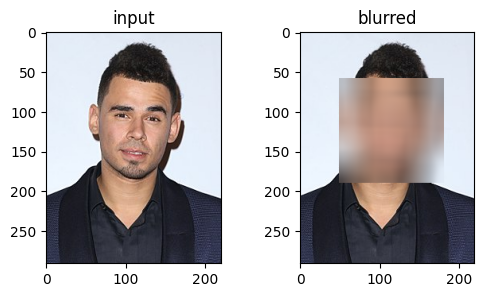

In [6]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Afrojack_2015.jpg')
height, width, c = image.shape
blurred = image.copy()

results = face_detection.process(image)
    
if results.detections:
    for face in results.detections:
        face_rect = np.multiply(
            [
                face.location_data.relative_bounding_box.xmin,
                face.location_data.relative_bounding_box.ymin,
                face.location_data.relative_bounding_box.width,
                face.location_data.relative_bounding_box.height,
            ],
            [width, height, width, height],
        ).astype(int)

        x, y, w, h = face_rect

        padding = 10
        
        x_min = x - padding
        x_max = x + padding + w
        y_min = y - padding
        y_max = y + padding + h
        
        if x_min <= 0:
            x_min = 0
        if y_min <= 0:
            y_min = 0
        if x_max >= width:
            x_max = width
        if y_max >= height:
            y_max = height

        face_roi = blurred[y_min:y_max, x_min:x_max]
        blurred[y_min:y_max, x_min:x_max] = cv2.blur(face_roi, (47, 47))

cv2.imshow('input',image)
cv2.imshow('blurred',blurred)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(6,3))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title('input')
plt.subplot(122);plt.imshow(blurred[:,:,::-1]);plt.title('blurred')

In [7]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Jens_Kidman_Meshuggah.jpg')
results = face_detection.process(image)

if results.detections:
    for detection in results.detections:
        print(detection.location_data.relative_bounding_box)

xmin: 0.21848653256893158
ymin: 0.21865516901016235
width: 0.26833492517471313
height: 0.3354065418243408



Text(0.5, 1.0, 'blurred')

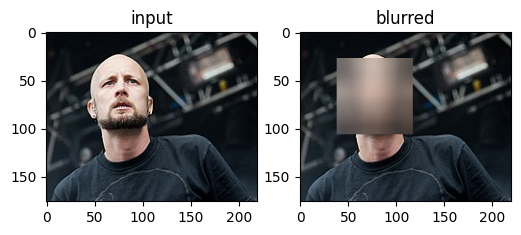

In [8]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Jens_Kidman_Meshuggah.jpg')
height, width, c = image.shape
blurred = image.copy()

results = face_detection.process(image)
    
if results.detections:
    for face in results.detections:
        face_rect = np.multiply(
            [
                face.location_data.relative_bounding_box.xmin,
                face.location_data.relative_bounding_box.ymin,
                face.location_data.relative_bounding_box.width,
                face.location_data.relative_bounding_box.height,
            ],
            [width, height, width, height],
        ).astype(int)

        x, y, w, h = face_rect

        padding = 10
        
        x_min = x - padding
        x_max = x + padding + w
        y_min = y - padding
        y_max = y + padding + h
        
        if x_min <= 0:
            x_min = 0
        if y_min <= 0:
            y_min = 0
        if x_max >= width:
            x_max = width
        if y_max >= height:
            y_max = height

        face_roi = blurred[y_min:y_max, x_min:x_max]
        blurred[y_min:y_max, x_min:x_max] = cv2.blur(face_roi, (47, 47))

cv2.imshow('input',image)
cv2.imshow('blurred',blurred)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(6,3))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title('input')
plt.subplot(122);plt.imshow(blurred[:,:,::-1]);plt.title('blurred')

___

#### 1.2 multiple faces : 

In [9]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Linkin-Park.jpg')
results = face_detection.process(image)

if results.detections:
    for detection in results.detections:
        print(detection.location_data.relative_bounding_box)

xmin: 0.2753334641456604
ymin: 0.20609050989151
width: 0.07888868451118469
height: 0.11839070916175842

xmin: 0.7632629871368408
ymin: 0.21140849590301514
width: 0.06822848320007324
height: 0.10240903496742249

xmin: 0.13794474303722382
ymin: 0.26509520411491394
width: 0.06804700195789337
height: 0.10208368301391602

xmin: 0.3725825548171997
ymin: 0.22718337178230286
width: 0.05757558345794678
height: 0.0863800048828125

xmin: 0.6139556765556335
ymin: 0.24381476640701294
width: 0.07338368892669678
height: 0.11012205481529236

xmin: 0.4732731282711029
ymin: 0.23192965984344482
width: 0.06570509076118469
height: 0.09864869713783264



Text(0.5, 1.0, 'blurred')

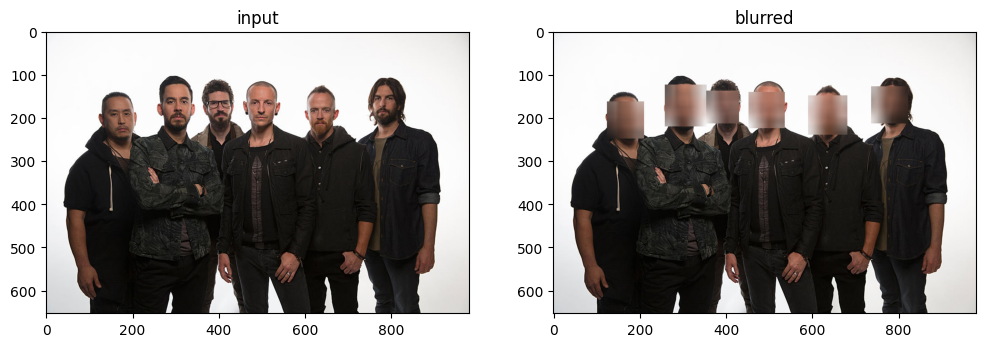

In [3]:
import cv2
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

image = cv2.imread('images/Linkin-Park.jpg')
height, width, c = image.shape
blurred = image.copy()

results = face_detection.process(image)
    
if results.detections:
    for face in results.detections:
        face_rect = np.multiply(
            [
                face.location_data.relative_bounding_box.xmin,
                face.location_data.relative_bounding_box.ymin,
                face.location_data.relative_bounding_box.width,
                face.location_data.relative_bounding_box.height,
            ],
            [width, height, width, height],
        ).astype(int)

        x, y, w, h = face_rect

        padding = 10
        
        x_min = x - padding
        x_max = x + padding + w
        y_min = y - padding
        y_max = y + padding + h
        
        if x_min <= 0:
            x_min = 0
        if y_min <= 0:
            y_min = 0
        if x_max >= width:
            x_max = width
        if y_max >= height:
            y_max = height

        face_roi = blurred[y_min:y_max, x_min:x_max]
        blurred[y_min:y_max, x_min:x_max] = cv2.blur(face_roi, (47, 47))

cv2.imshow('input',image)
cv2.imshow('blurred',blurred)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(12,10))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title('input')
plt.subplot(122);plt.imshow(blurred[:,:,::-1]);plt.title('blurred')

___

### 2. blurring faces in a camera source (real-time blurring) using mediapipe 

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.3)

cap = cv2.VideoCapture(0)

# shape of the camera frames are (480, 640, 3)
height = 480
width = 640



while True:
    
    ret, frame = cap.read()
    if not ret: 
        break
    
    blurred = frame.copy()
    
    results = face_detection.process(frame)
    if results.detections:
        for face in results.detections:
            face_rect = np.multiply(
                [
                    face.location_data.relative_bounding_box.xmin,
                    face.location_data.relative_bounding_box.ymin,
                    face.location_data.relative_bounding_box.width,
                    face.location_data.relative_bounding_box.height,
                ],
                [width, height, width, height],
            ).astype(int)

            x, y, w, h = face_rect

            padding = 10

            x_min = x - padding
            x_max = x + padding + w
            y_min = y - padding
            y_max = y + padding + h

            if x_min <= 0:
                x_min = 0
            if y_min <= 0:
                y_min = 0
            if x_max >= width:
                x_max = width
            if y_max >= height:
                y_max = height

            face_roi = blurred[y_min:y_max, x_min:x_max]
            blurred[y_min:y_max, x_min:x_max] = cv2.blur(face_roi, (47, 47))

    cv2.imshow('input',frame)
    cv2.imshow('blurred',blurred)
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
        
        
cap.release()
cv2.destroyAllWindows()